In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv('../Data/merged.csv')
df.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
0,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,1.8007,...,0.5819,3.5764,0.0000,9.3024,11.3338,7.7186,10.6898,7.0992,11.1740,1
1,TCGA-A8-A096-01,9.7665,0.2738,0.8765,11.8118,10.8554,10.4282,12.4810,4.3232,0.0000,...,9.5174,5.3021,0.0000,9.1369,12.7711,8.7307,10.5158,5.9003,9.8729,1
2,TCGA-BH-A0C7-01,10.0931,3.6090,0.0000,11.3820,10.7663,10.3366,12.7240,2.2163,0.3340,...,1.2032,3.8365,0.0000,9.5725,11.8181,7.9077,10.7539,6.5823,9.7063,1
3,TCGA-AR-A0TV-01,9.6694,0.4330,0.0000,11.9378,11.2889,10.6282,11.7596,3.5666,0.0000,...,4.2628,4.6919,2.0530,9.1760,10.3455,8.0183,10.6109,7.2024,10.4880,1
4,TCGA-GM-A3XG-01,10.2287,5.3420,0.0000,11.8971,11.3988,10.3007,12.7280,4.5791,0.0000,...,2.0437,4.1135,0.4297,8.9456,13.6688,6.9724,12.2322,7.7879,10.1317,1


In [3]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
ARHGEF10L     0
HIF3A         0
RNF17         0
RNF10         0
             ..
BCL6B         0
GSTK1         0
SELP          0
SELS          0
label         0
Length: 20532, dtype: int64

## Standardize the data

In [4]:
# standardize the data except label
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:, 1:-1] = scaler.fit_transform(df.iloc[:, 1:-1])
df.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,label
0,TCGA-A8-A06X-01,-0.058777,-1.149160,-0.333486,0.412170,0.444640,-0.432646,0.181457,0.108418,3.363095,...,-0.786584,-0.809907,-0.528660,0.036956,-0.730643,-0.278269,-0.621638,0.446248,2.105537,1
1,TCGA-A8-A096-01,0.121701,-1.313885,0.895909,-0.143454,-0.367258,0.143828,-0.169245,0.145486,-0.663510,...,2.535428,1.225401,-0.528660,-0.285920,0.733620,0.883545,-0.881372,-0.130536,-0.494433,1
2,TCGA-BH-A0C7-01,0.594009,0.469273,-0.333486,-1.388537,-0.548516,-0.044627,0.301068,-1.526825,0.083358,...,-0.555599,-0.503142,-0.528660,0.563896,-0.237258,-0.061197,-0.525955,0.197571,-0.827347,1
3,TCGA-AR-A0TV-01,-0.018719,-1.228769,-0.333486,0.221554,0.514621,0.555301,-1.565476,-0.455051,-0.663510,...,0.581889,0.505725,1.225393,-0.209639,-1.737483,0.065764,-0.739414,0.495897,0.734713,1
4,TCGA-GM-A3XG-01,0.790105,1.395817,-0.333486,0.103651,0.738193,-0.118486,0.308810,0.348601,-0.663510,...,-0.243121,-0.176445,-0.161531,-0.659129,1.648160,-1.134850,1.680733,0.777578,0.022724,1


## Seperate features and labels

In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(412, 20530)
(412,)


## Train test split

In [6]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 20530)
(83, 20530)
(329,)
(83,)


## Grid search for finding best parameters

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# Create a GridSearchCV object
search = GridSearchCV(SVC(probability=True), parameters, n_jobs=-1, verbose=2)

# Fit the grid search to the data
search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=2)

In [8]:
best_params = search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'kernel': 'linear'}


## Picking the best model

In [9]:
best_model = search.best_estimator_
best_model

SVC(C=1, kernel='linear', probability=True)

## Quick check on all the models

In [10]:
search.cv_results_

{'mean_fit_time': array([16.15889826, 14.48498654, 15.59637041, 13.79011827, 34.70225506,
        34.75768394, 33.54400177, 32.29973745, 36.58961825, 34.21482162,
        31.93121161, 34.29552317, 32.71017308, 34.59387436, 32.94646916,
        32.52998996, 32.94589157, 33.49108391, 36.9112371 , 35.51486201,
        37.86233778, 31.41406131, 37.48963981, 33.53584523, 33.64278955,
        33.29614344, 35.01282706, 35.30638905, 32.83690438, 33.50668731,
        33.92349353, 37.0889864 , 30.27378068, 37.90372343, 31.41562634,
        33.92261662, 32.5865922 , 32.46415339, 33.40936995, 23.98224583]),
 'std_fit_time': array([2.46945488, 1.94415691, 3.0843986 , 3.01355808, 4.21169444,
        6.54385941, 5.53769498, 5.16972067, 4.78335914, 5.4631208 ,
        4.81344818, 4.41190604, 3.53793979, 3.15895619, 2.49188693,
        2.96895598, 2.64621997, 3.53388349, 4.39116041, 4.96613453,
        3.53435235, 1.95807669, 3.50274656, 5.23571603, 5.30259124,
        2.90836925, 4.30195164, 3.0557466

## Evaluating the best model

In [11]:
best_score = search.best_score_     # this is accuracy score
print("Best Score:", best_score)    

Best Score: 0.9301631701631703


### Test accuracy

In [12]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.927710843373494


### AUC score

In [13]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.8600746268656717


### ROC curve

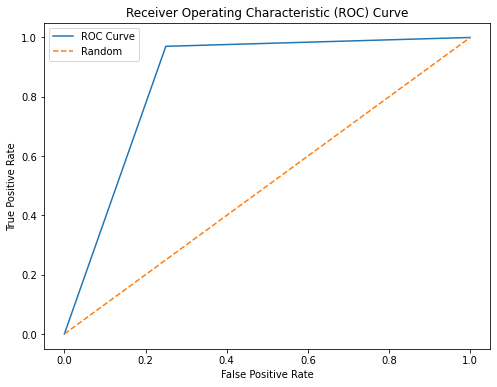

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Confusion matrix

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[12,  4],
       [ 2, 65]], dtype=int64)

## Saving the model

In [18]:
dict = {
    'Model': best_model,
    'Best Parameters': best_params,
    'Training Set Accuracy': best_score,
    'Test Set Accuracy': test_accuracy,
    'AUC Score': auc_score
}

# save the dictionary to a pickle file
import pickle

with open('svm_all_dim.pkl', 'wb') as f:
    pickle.dump(dict, f)

In [19]:
# save all the data

with open('../Data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('../Data/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('../Data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('../Data/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [1]:
import pickle

with open('svm_all_dim.pkl', 'rb') as f:
    dict = pickle.load(f)

print(dict)

{'Model': SVC(C=1, kernel='linear', probability=True), 'Best Parameters': {'C': 1, 'kernel': 'linear'}, 'Training Set Accuracy': 0.9301631701631703, 'Test Set Accuracy': 0.927710843373494, 'AUC Score': 0.8600746268656717}
